In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
c = pd.read_csv(link)
c.head()

,date,country,city,maximum_temprature,minimum_temprature,wind_speed,wind_direction,amount_of_rain,humidity,cloud_coverage,pressure
0,2009-01-01,Brazil,Sao Bernardo Do Campo,25,21,7,W,13.6,92,54,1011
1,2009-01-02,Brazil,Sao Bernardo Do Campo,25,21,5,SE,28.9,94,65,1009
2,2009-01-03,Brazil,Sao Bernardo Do Campo,25,22,12,W,10.9,91,53,1004
3,2009-01-04,Brazil,Sao Bernardo Do Campo,18,18,11,SSW,5.4,96,92,1008
4,2009-01-05,Brazil,Sao Bernardo Do Campo,20,17,9,SSE,2.0,95,86,1013


a) Gráfico

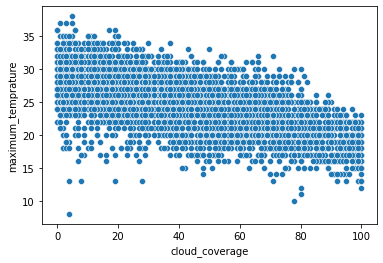

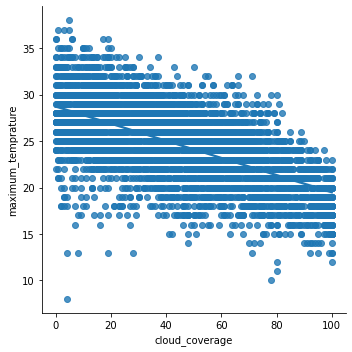

In [9]:
sns.scatterplot(x='cloud_coverage',y='maximum_temprature', data=c)
sns.lmplot(x='cloud_coverage',y='maximum_temprature', data=c)


In [10]:
#figure, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))

dados = c[c.columns[3:13]]

c.corr()



,maximum_temprature,minimum_temprature,wind_speed,amount_of_rain,humidity,cloud_coverage,pressure
maximum_temprature,1.000000,0.693886,-0.347184,-0.066809,-0.602500,-0.602276,-0.485520
minimum_temprature,0.693886,1.000000,-0.112004,0.218748,-0.288325,-0.081743,-0.681323
wind_speed,-0.347184,-0.112004,1.000000,0.004259,0.008556,0.301015,0.029111
amount_of_rain,-0.066809,0.218748,0.004259,1.000000,0.300114,0.382027,-0.299599
humidity,-0.602500,-0.288325,0.008556,0.300114,1.000000,0.638410,0.040275
cloud_coverage,-0.602276,-0.081743,0.301015,0.382027,0.638410,1.000000,-0.014269
pressure,-0.485520,-0.681323,0.029111,-0.299599,0.040275,-0.014269,1.000000


<AxesSubplot:xlabel='pressure', ylabel='maximum_temprature'>

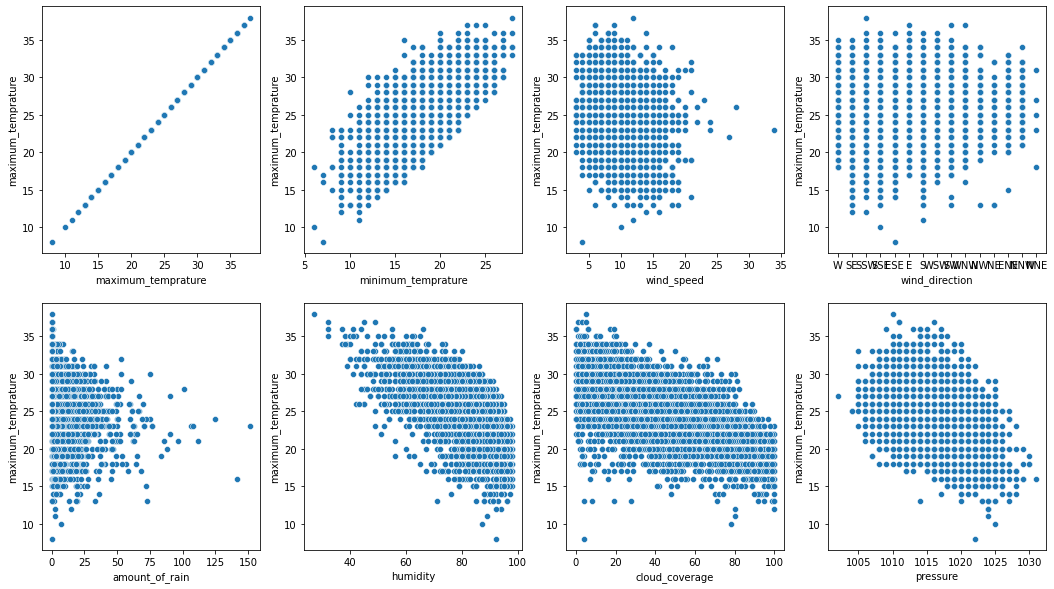

In [11]:

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
 
 
sns.scatterplot(ax=axes[0,0], data=dados,x='maximum_temprature',y='maximum_temprature')
sns.scatterplot(ax=axes[0,1], data=dados,x='minimum_temprature',y='maximum_temprature')
sns.scatterplot(ax=axes[0,2], data=dados,x='wind_speed',y='maximum_temprature')
sns.scatterplot(ax=axes[0,3], data=dados,x='wind_direction',y='maximum_temprature')
sns.scatterplot(ax=axes[1,0], data=dados,x='amount_of_rain',y='maximum_temprature')
sns.scatterplot(ax=axes[1,1], data=dados,x='humidity',y='maximum_temprature')
sns.scatterplot(ax=axes[1,2], data=dados,x='cloud_coverage',y='maximum_temprature')
sns.scatterplot(ax=axes[1,3], data=dados,x='pressure',y='maximum_temprature')


c) Exportação

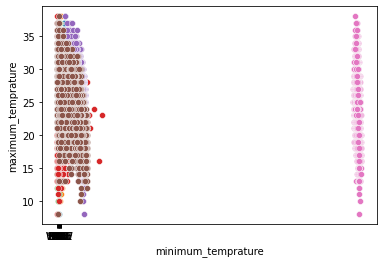

In [12]:
for n in range(1,8):
    variavel = str(dados.columns[n])
    sns.scatterplot(data=dados,x=variavel,y='maximum_temprature')
    plt.savefig(variavel + '.png')

d) Modelo

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
dados_sbc = c[c['city'] == 'Sao Bernardo Do Campo']
colunas_selecionadas = ['humidity','wind_speed','pressure']
X = dados_sbc[colunas_selecionadas]
y = dados_sbc[['maximum_temprature']]
reg = LinearRegression().fit(X, y)
print('intercept:' + str(reg.intercept_)) 
print('coeficientes:' + str(reg.coef_))
print('R²:' + str(reg.score(X,y)))


intercept:[486.57409154]
coeficientes:[[-0.21516045 -0.42815208 -0.43384331]]
R²:0.6842747797434257


In [15]:
import statsmodels.api as sm
x_sm = sm.add_constant(X)
reg1 = sm.OLS(y,x_sm).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     maximum_temprature   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     3295.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:46:51   Log-Likelihood:                -10346.
No. Observations:                4565   AIC:                         2.070e+04
Df Residuals:                    4561   BIC:                         2.072e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        486.5741      8.103     60.046      0.000     470.688     502.461
humidity      -0.2152      0.003    -69.828      0.000      -0.221      -0.209
wind_speed    -0.4282      0.011    -39.530      0.000      -0.449      -0.407
pressure      -0.4338      0.008    -54.323      0.000      -0.450      -0.418
==============================================================================
Omnibus:                       83.524   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.444
Skew:                          -0.303   Prob(JB):                     1.39e-20
Kurtosis:                       3.338   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

e) Comparação

<AxesSubplot:xlabel='maximum_temprature', ylabel='valores_preditos'>

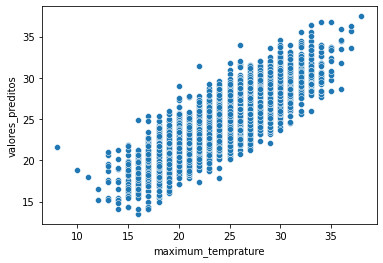

In [16]:
valores_preditos = reg.predict(X)
visualizar_dados = c[['maximum_temprature']]
visualizar_dados.insert(0, 'valores_preditos', reg.predict(X), True)
sns.scatterplot(x='maximum_temprature',y='valores_preditos', data=visualizar_dados)

2) Sorteios
a) Umidade



In [17]:
def calcular_media(base,coluna,sample):
    base_media = base.sample(sample)
    return base_media[coluna].mean()

valores = []

for n in range(1,1001):
    valores.append(calcular_media(c,'humidity',1000))


b) Histograma

<AxesSubplot:ylabel='Count'>

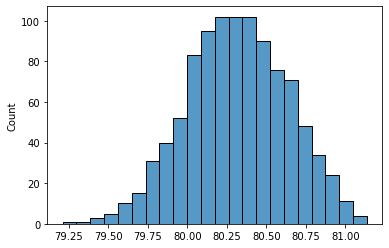

In [18]:
sns.histplot(x=valores)

c) Modelos lineares

In [19]:


X = np.array(valores).reshape(-1,1)
y = np.array(valores)
regh = LinearRegression().fit(X,y)
#print('intercept:' + str(reg.intercept_)) 
#print('coeficientes:' + str(reg.coef_))
print('R²:' + str(regh.score(X,y)))


R²:1.0


In [40]:
def modelo_adhoc(base,y,sample,x):
    #seed = random.randint(1,20)
    #random.seed(seed)
    base_media = base.sample(sample)
    Y = base_media[y]
    X = base_media[x]
    regh = LinearRegression().fit(X,Y)
    #print('seed:' +str(seed))
    print('intercept:' + str(regh.intercept_)) 
    print('coeficientes:' + str(regh.coef_))
    print('R²:' + str(regh.score(X,Y)))
    print('\n')



In [41]:
modelo_adhoc(c,['humidity'],1000,['maximum_temprature','wind_speed','pressure'])
modelo_adhoc(c,['humidity'],100,['maximum_temprature','wind_speed','pressure'])
modelo_adhoc(c,['humidity'],1000,['maximum_temprature','wind_speed','pressure'])
modelo_adhoc(c,['humidity'],1000,['maximum_temprature','wind_speed','pressure'])


intercept:[1153.10148218]
coeficientes:[[-2.38345923 -0.85629517 -0.99033321]]
R²:0.5398941832573216


intercept:[926.02456064]
coeficientes:[[-2.43707388 -1.35998558 -0.76090346]]
R²:0.5314501496165784


intercept:[1236.32725719]
coeficientes:[[-2.5622696  -1.14962525 -1.06552472]]
R²:0.5687666714655187


intercept:[1094.78003592]
coeficientes:[[-2.46043162 -1.05467083 -0.92992144]]
R²:0.5256788217672683




3) Frameworks

Feito no item 2.